In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
#from time import perf_counter 
import os

"""
thisdict = {
  0: "Yes_Drowsy ",
  1: "No_Drowsy ",
 
}
"""


'\nthisdict = {\n  0: "Yes_Drowsy ",\n  1: "No_Drowsy ",\n \n}\n'

In [63]:
from keras.layers import Convolution2D

In [64]:
from keras.layers import MaxPooling2D

In [65]:
from keras.layers import Flatten

In [66]:
from keras.layers import Dense

In [67]:
from keras.models import Sequential

In [68]:
model = Sequential()

In [69]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation= 'relu',
                   input_shape=(64, 64, 3)
                       ))

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [72]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [73]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.add(Flatten())

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.add(Dense(units=128, activation='relu'))

In [78]:
model.add(Dense(units=60, activation='relu'))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 60)               

In [80]:
model.add(Dense(units=2, activation='sigmoid'))
#model.add(Dense(8, activation='softmax'))   # Final Layer using Softmax

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 60)               

In [82]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [83]:
from keras_preprocessing.image import ImageDataGenerator

In [84]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'DataSet/TrainingDataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'DataSet/TestDataset/',
        target_size=(64, 64,),
        batch_size=32,
        class_mode='binary')

Found 3873 images belonging to 2 classes.
Found 1175 images belonging to 2 classes.


In [85]:
"""
model.fit(
        training_set,
        steps_per_epoch=3873,
        epochs=4,
        validation_data=test_set,
        validation_steps=800)
       """ 

'\nmodel.fit(\n        training_set,\n        steps_per_epoch=3873,\n        epochs=4,\n        validation_data=test_set,\n        validation_steps=800)\n       '

In [86]:
#model.save('DrowsySafe2.h5')

In [87]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [88]:
m = load_model('DrowsySafe2.h5')

In [89]:
from keras.preprocessing import image

Array of Classes: [0. 1.]
yes Drowsy Detected
Number of Categories: 2


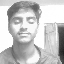

In [103]:
import numpy as np
import random
import pyttsx3
n = random.randint(1,21)

#if n%2==0:
test_image = image.load_img("DataSet/SinglePrediction/%d.png" %n , target_size=(64,64))
test_image1 = image.img_to_array(test_image)
test_image2 = np.expand_dims(test_image1, axis=0)
#print(test_image2)

p = m.predict(test_image2)
num = np.array(p[0]) 

num1 = np.array(p[0][1]) 
print("Array of Classes:",num)

if num1 == 1.0:
    print("yes Drowsy Detected")
    engine = pyttsx3.init()
    engine.say("Hey You are sleeping")
    engine.runAndWait()
    
else:
    print("No Drowsy Detected")

print("Number of Categories:",len(num))
#print("Drowsy_Detected")
test_image



In [ ]:
"""
else:
    test_image = image.load_img("DataSet/SinglePrediction/%d.png" %n , target_size=(64,64))
    test_image1 = image.img_to_array(test_image)
    test_image2 = np.expand_dims(test_image1, axis=0)
    
    p = m.predict(test_image2)
    num = np.array(p[0])  
    print(num)
    print("Number of Categories:",len(num))
    #print("Category Number:",n)
    #print("Check_Drowsy:",thisdict[n])
    print("No_Drowsy_Detected")
    
    print(test_image)
    
"""